In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['class'] = cancer.target

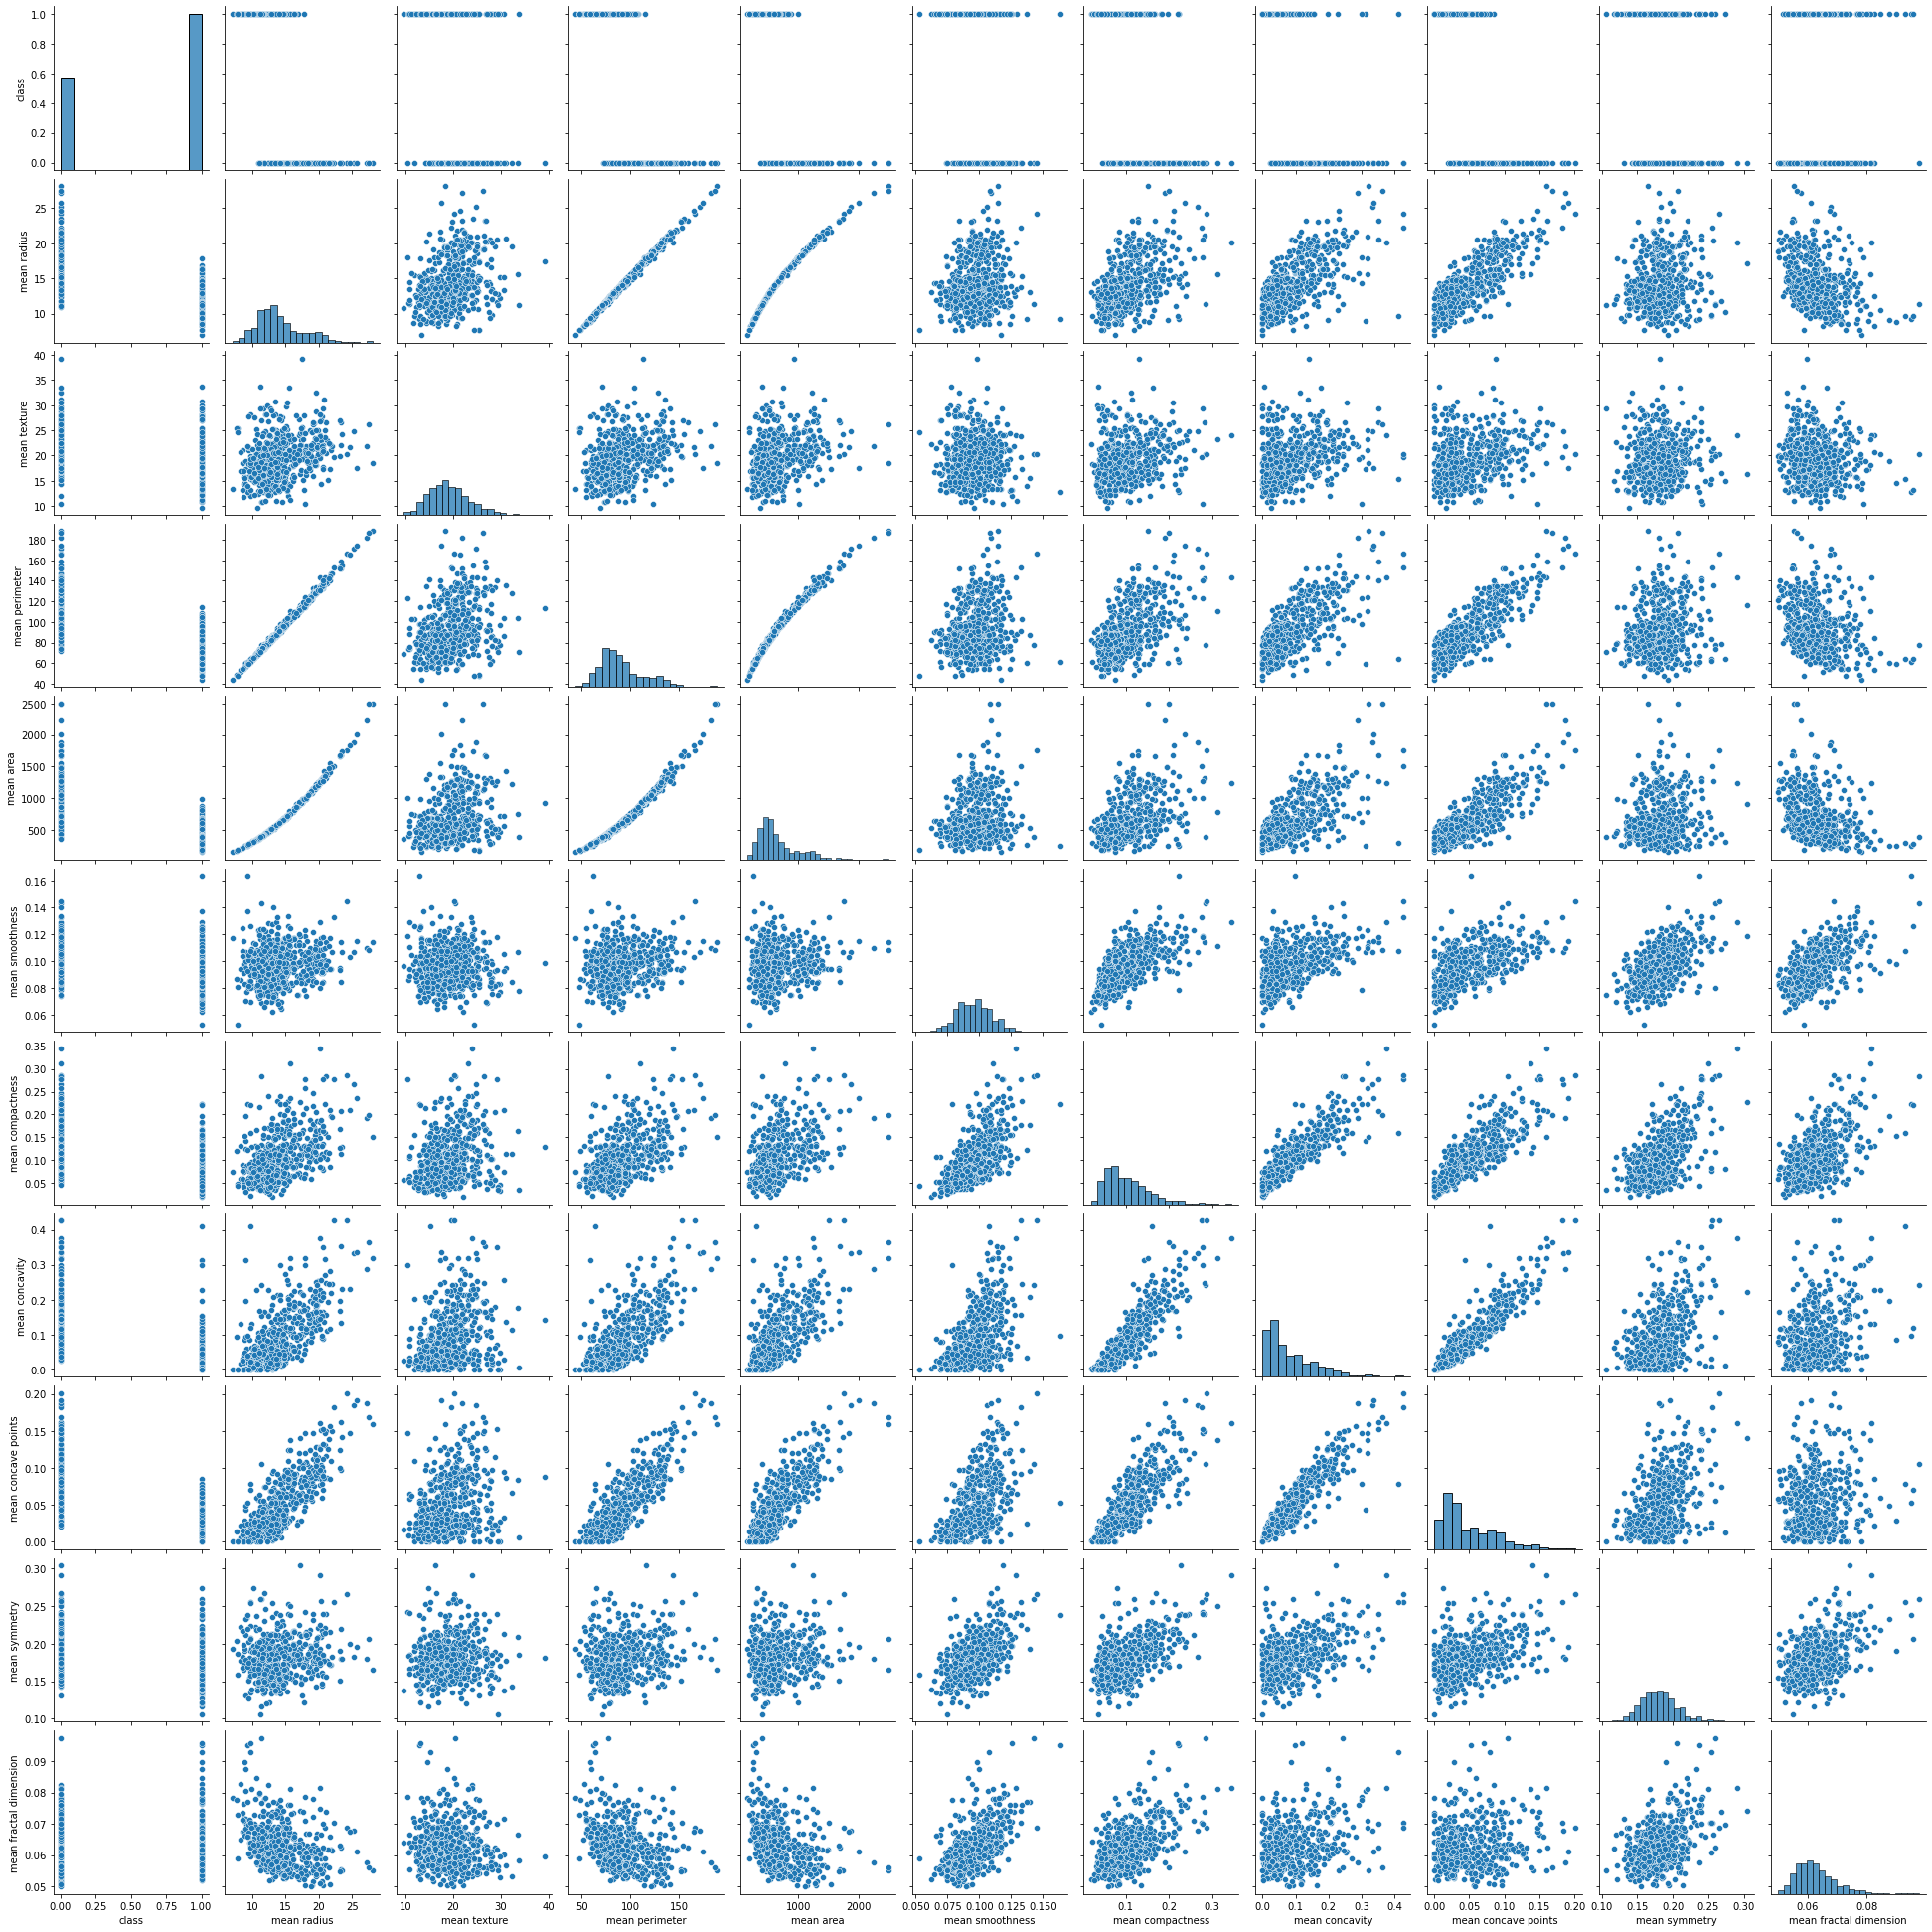

In [4]:
sns.pairplot(df[['class'] + list(df.columns[:10])])
plt.show()

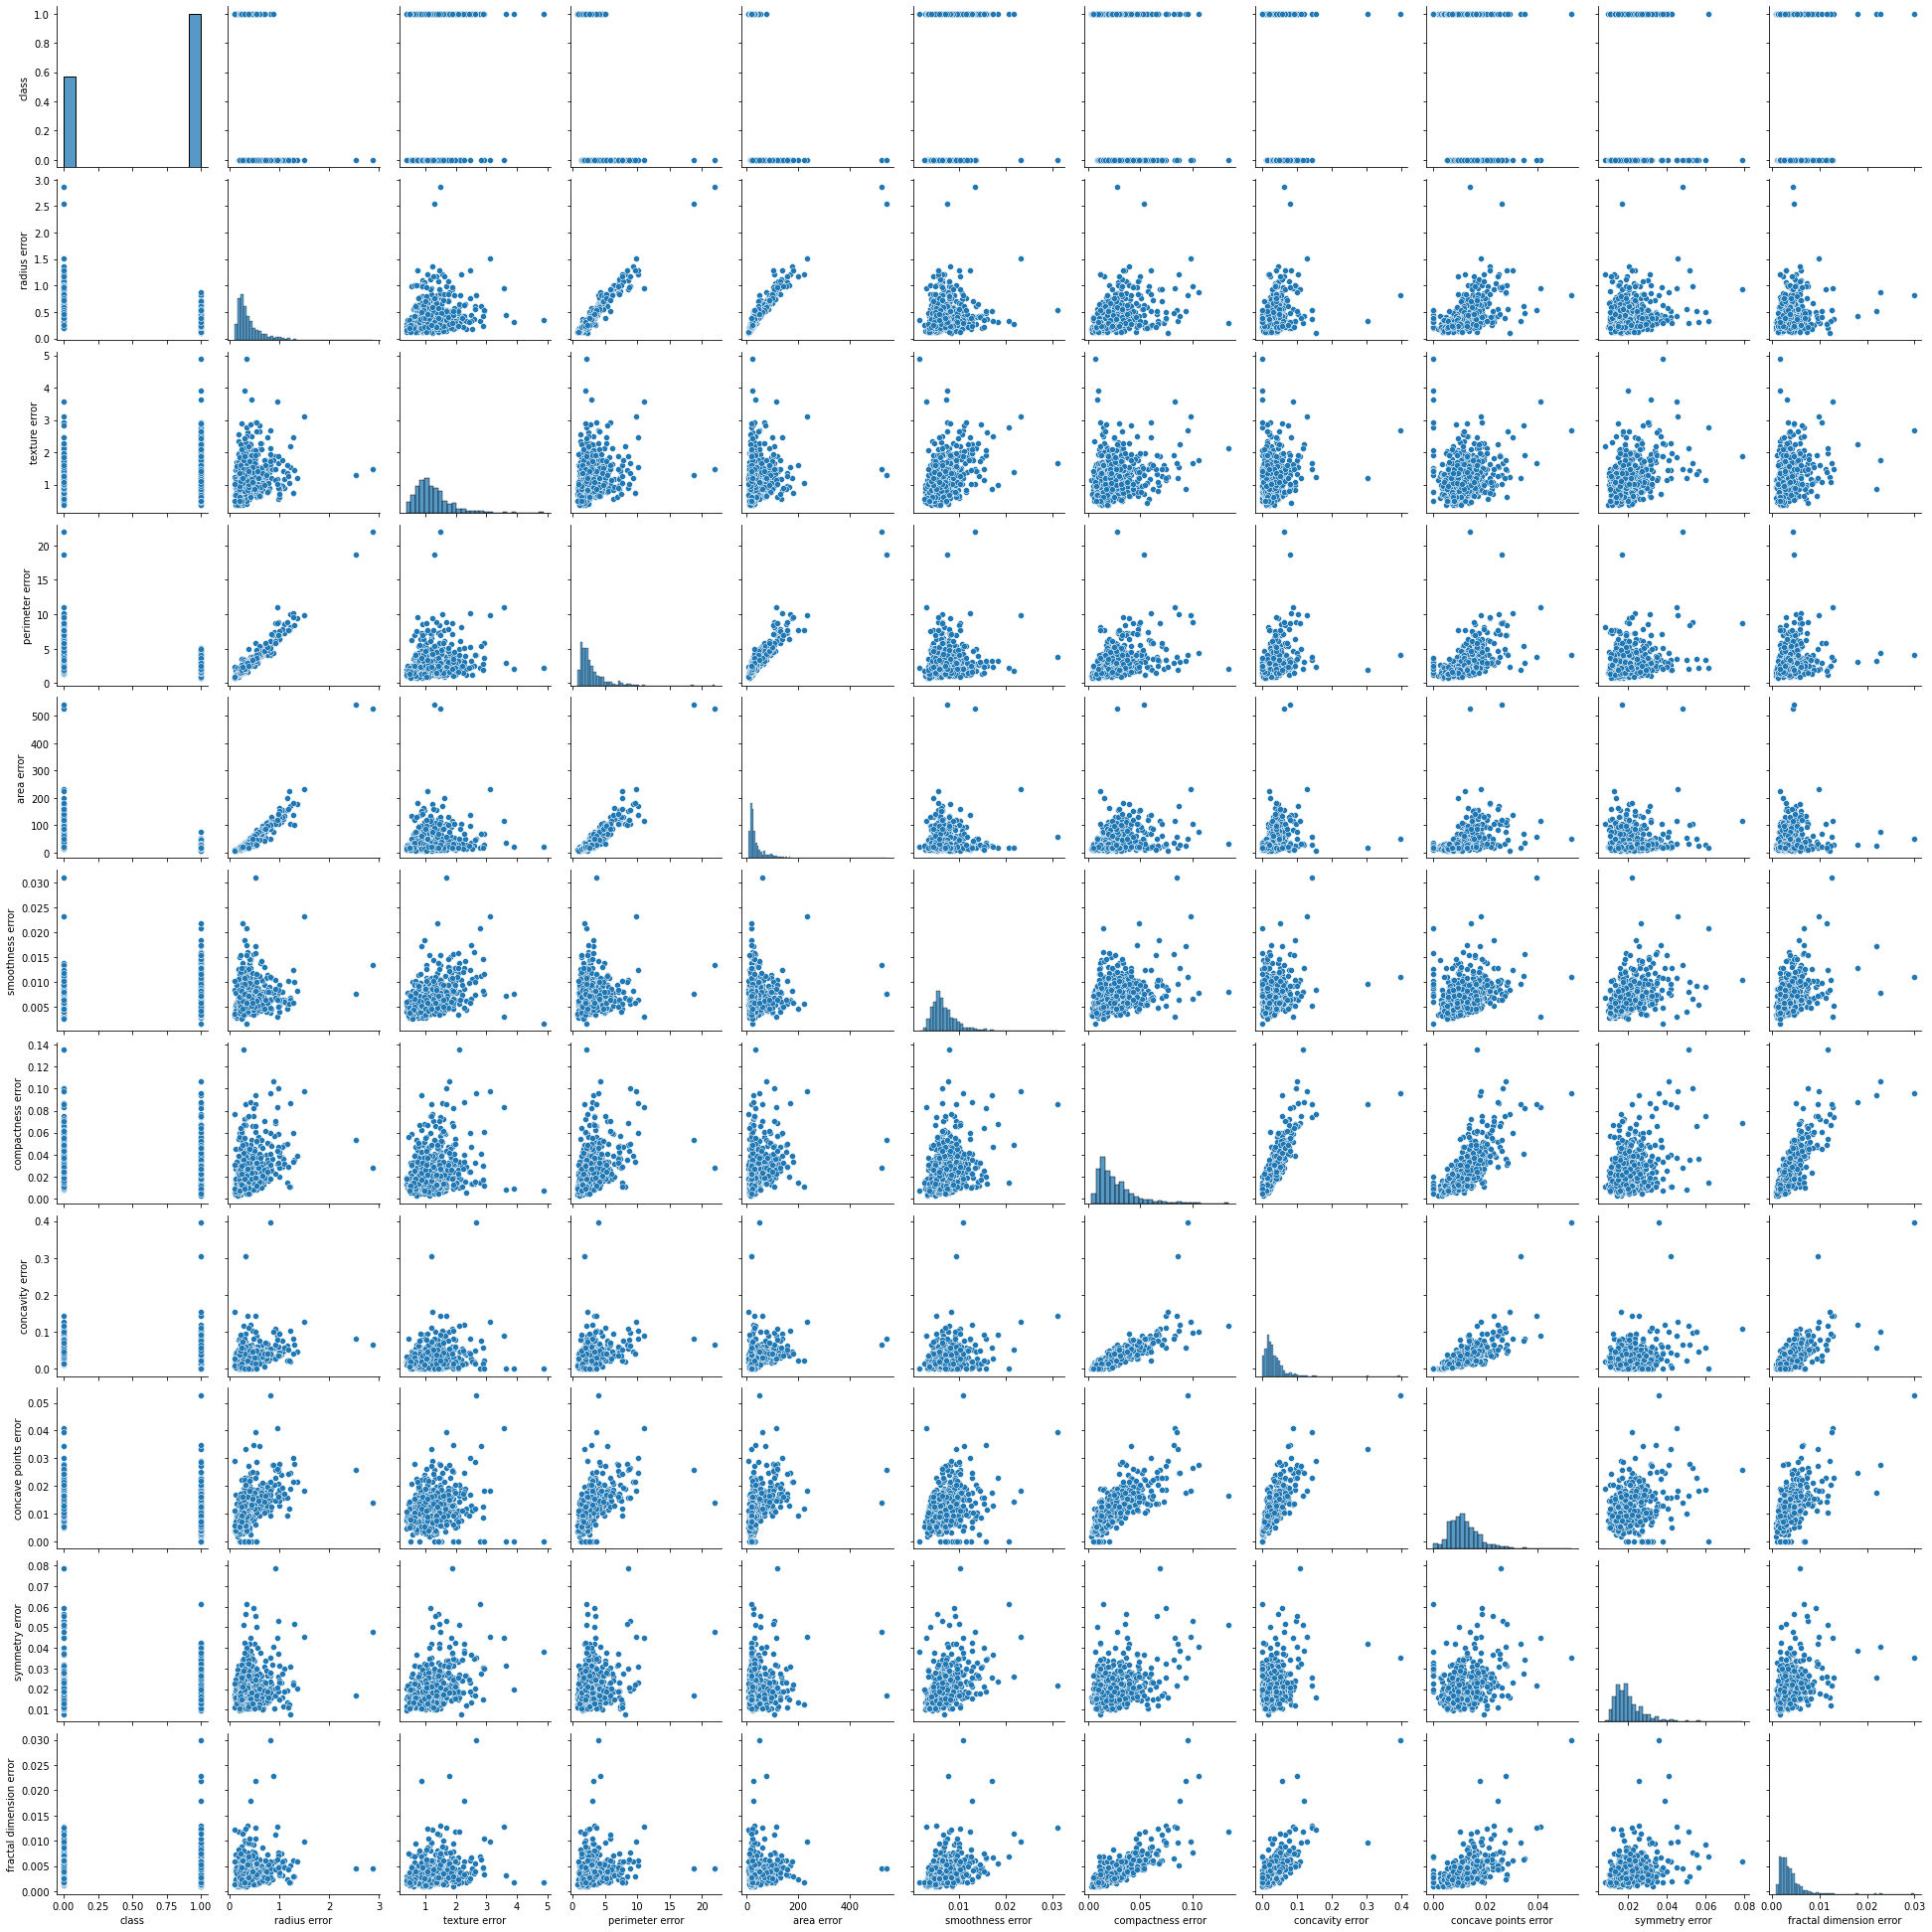

In [5]:
sns.pairplot(df[['class'] + list(df.columns[10:20])])
plt.show()

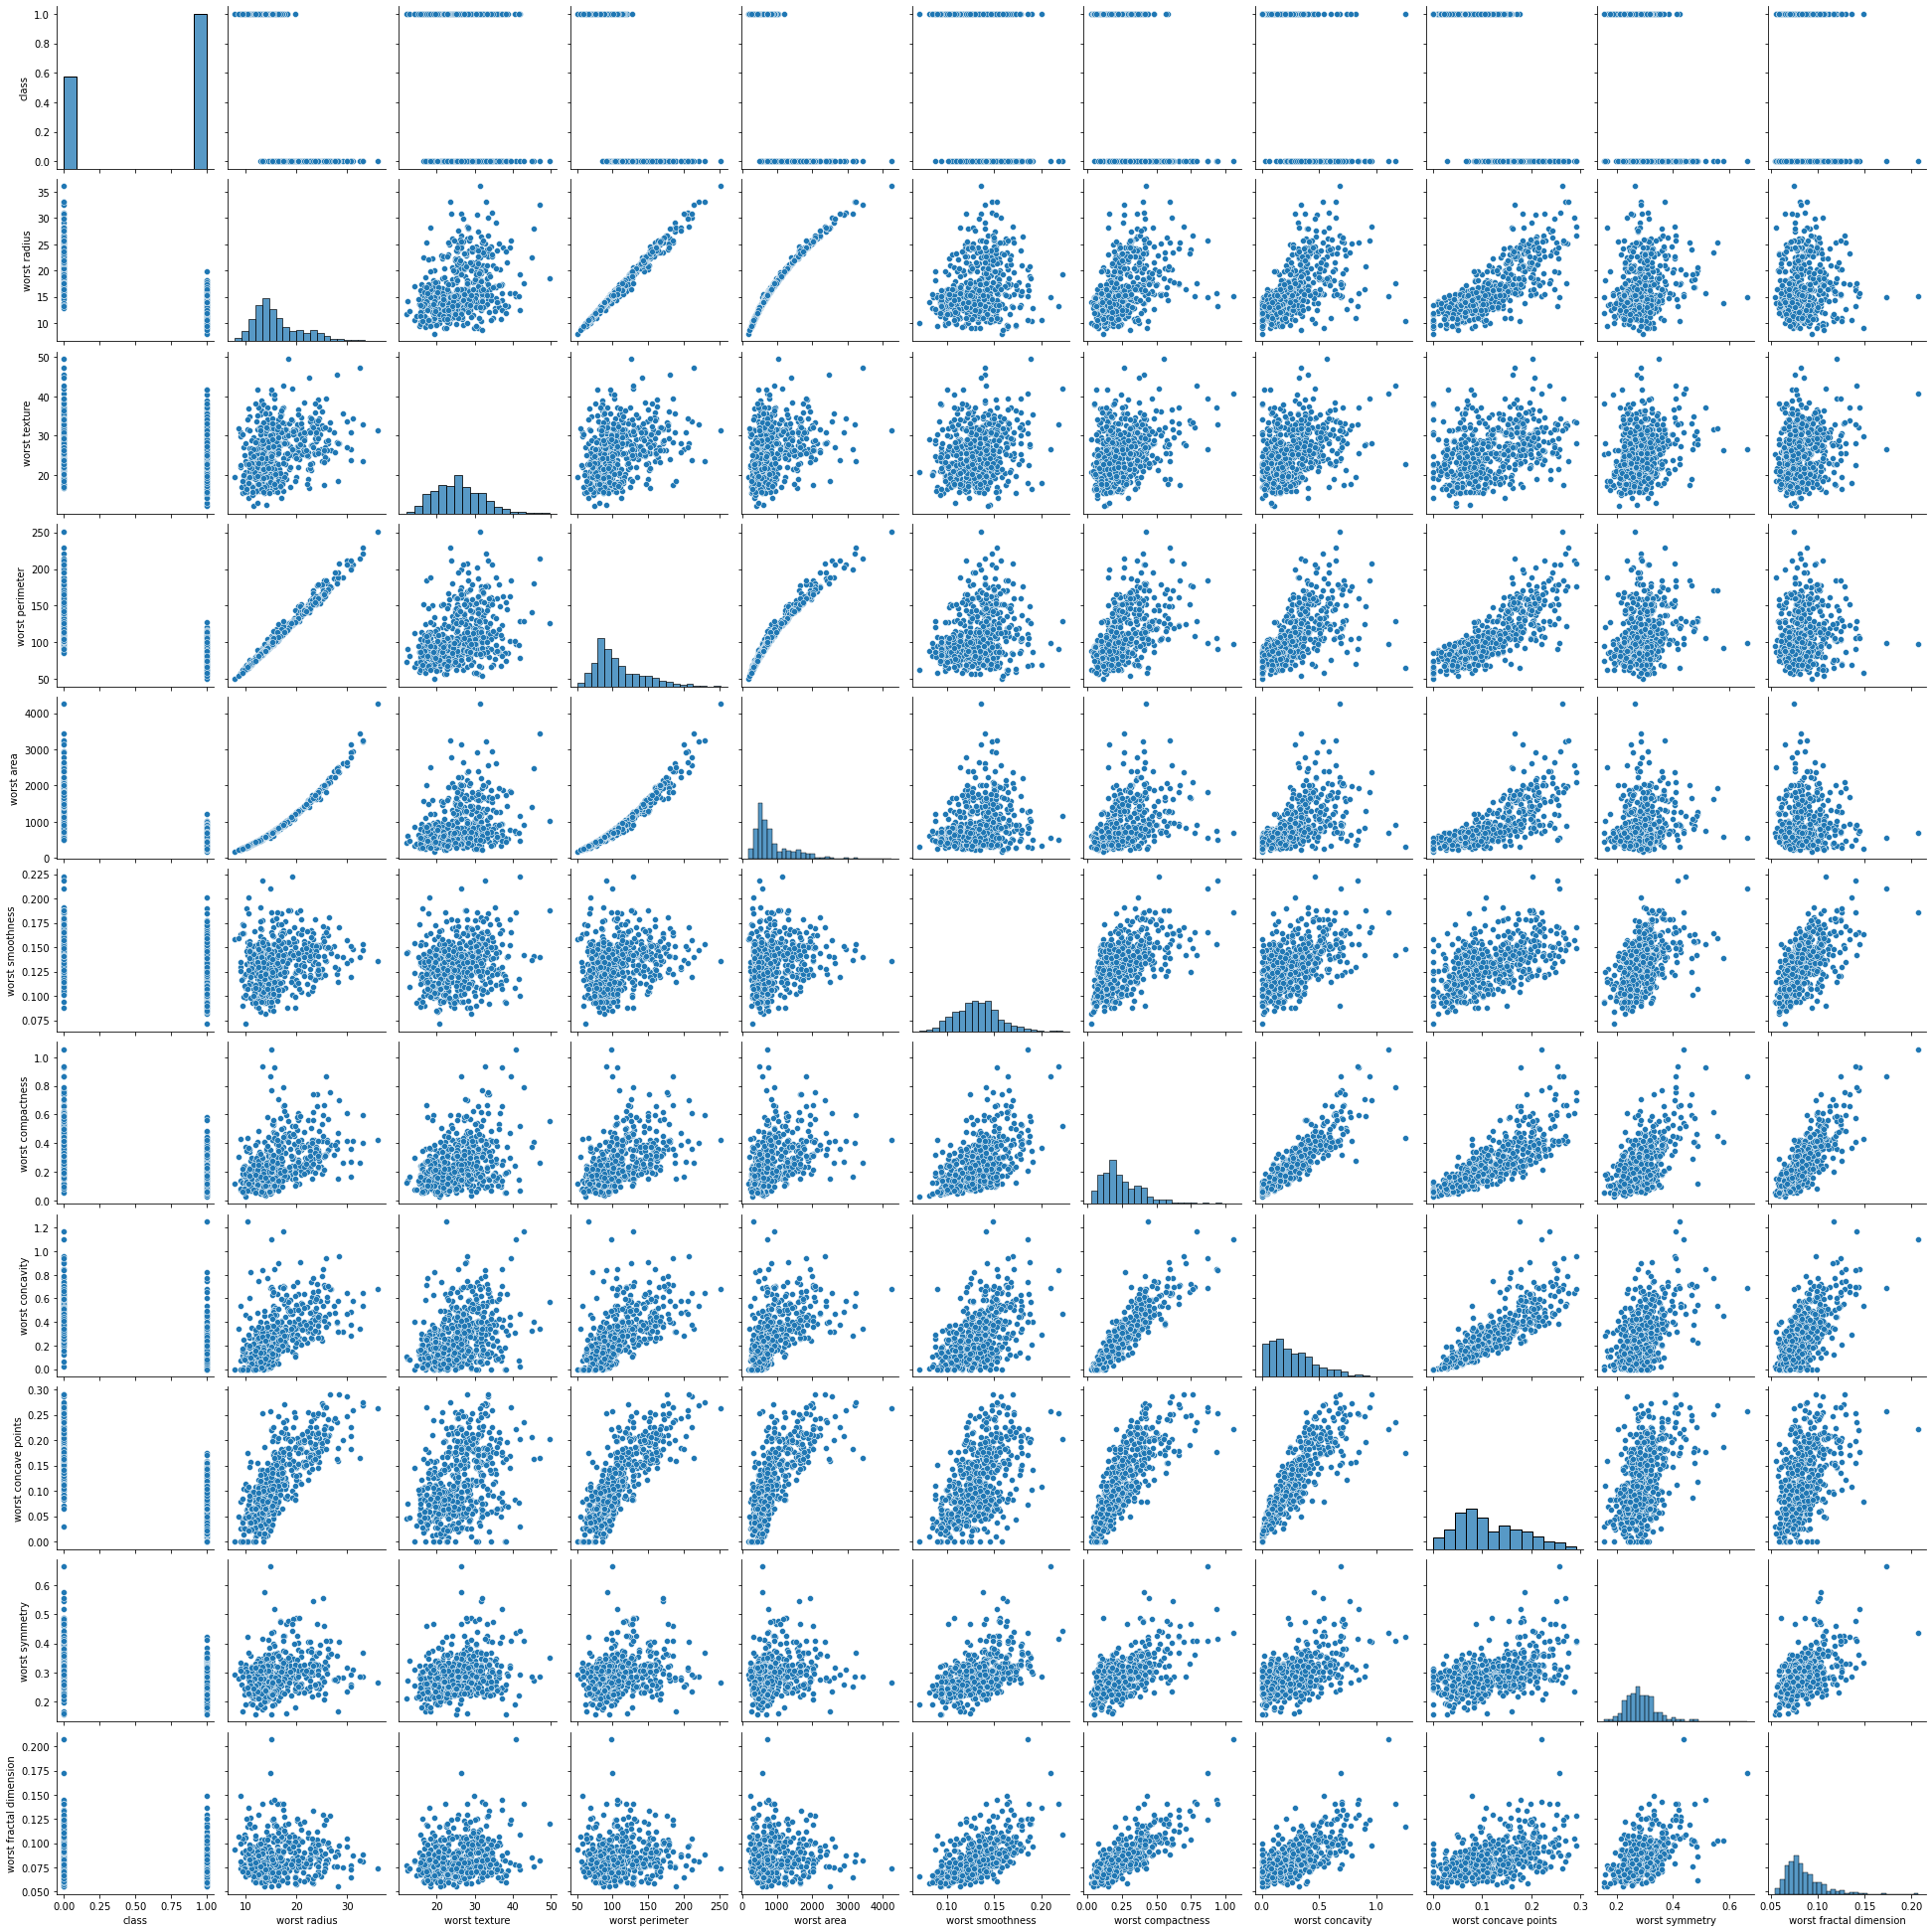

In [6]:
sns.pairplot(df[['class'] + list(df.columns[20:30])])
plt.show()

mean radius


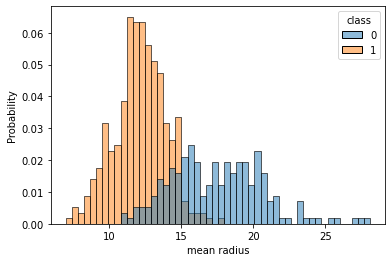

mean texture


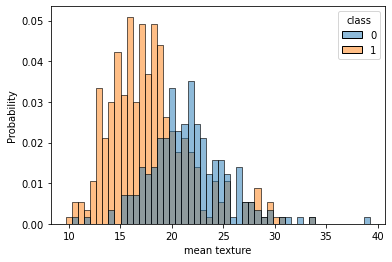

mean smoothness


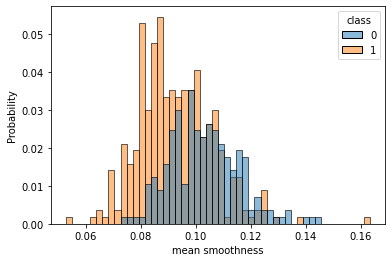

mean compactness


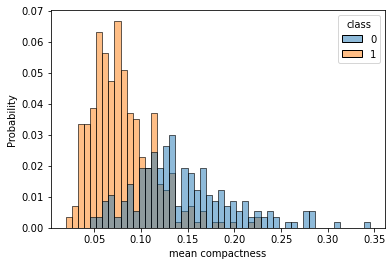

mean concave points


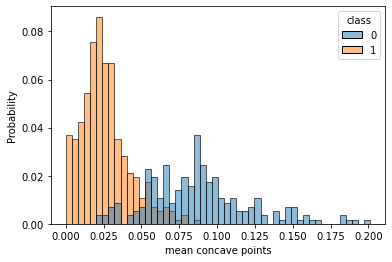

worst radius


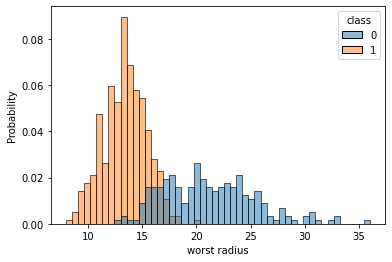

worst texture


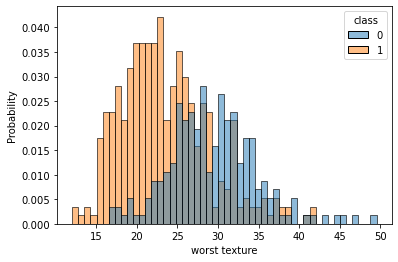

worst smoothness


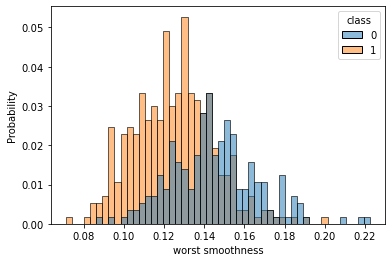

worst compactness


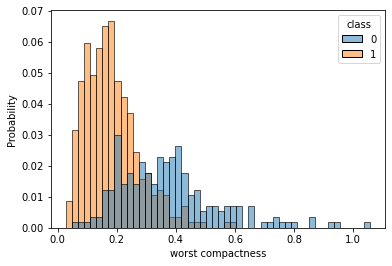

worst concave points


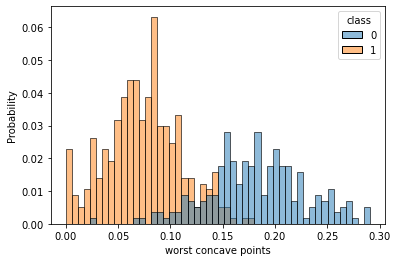

In [12]:
cols = ['mean radius', 'mean texture', 'mean smoothness',
        'mean compactness', 'mean concave points', 'worst radius',
        'worst texture', 'worst smoothness', 'worst compactness', 'worst concave points',
        'class']

for c in cols[:-1]:
    print(c)
    sns.histplot(df, x=c, hue=cols[-1], bins=50, stat='probability')
    plt.show()

## 학습 코드 구현

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

data = torch.from_numpy(df[cols].values).float()

data.shape

x = data[:, :-1]
y = data[:, -1:]

print(x.shape, y.shape)

torch.Size([569, 10]) torch.Size([569, 1])


In [14]:
n_epochs = 200000
learning_rate = 1e-2
print_interval = 10000

In [15]:
class MyModel(nn.Module):
    
    def __init__(self, input_dim, output_dim):
        self.input_dim = input_dim
        self.output_dim = output_dim

        super().__init__()

        self.linear = nn.Linear(input_dim, output_dim)
        self.act = nn.Sigmoid()

    def forward(self,x):
        y = self.act(self.linear(x))

        return y

In [16]:
model = MyModel(input_dim=x.size(-1), output_dim=y.size(-1))
crit = nn.BCELoss()

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [17]:
for i in range(n_epochs):
    y_hat = model(x)
    loss = crit(y_hat, y)

    optimizer.zero_grad()
    loss.backward()

    optimizer.step()

    if (i+1) % print_interval == 0:
        print('Epoch %d: loss =%.4e' % (i+1, loss))

Epoch 10000: loss =2.7652e-01
Epoch 20000: loss =2.2812e-01
Epoch 30000: loss =1.9925e-01
Epoch 40000: loss =1.8039e-01
Epoch 50000: loss =1.6722e-01
Epoch 60000: loss =1.5751e-01
Epoch 70000: loss =1.5006e-01
Epoch 80000: loss =1.4417e-01
Epoch 90000: loss =1.3938e-01
Epoch 100000: loss =1.3541e-01
Epoch 110000: loss =1.3206e-01
Epoch 120000: loss =1.2919e-01
Epoch 130000: loss =1.2671e-01
Epoch 140000: loss =1.2454e-01
Epoch 150000: loss =1.2262e-01
Epoch 160000: loss =1.2091e-01
Epoch 170000: loss =1.1938e-01
Epoch 180000: loss =1.1800e-01
Epoch 190000: loss =1.1674e-01
Epoch 200000: loss =1.1559e-01


## 결과 확인

In [22]:
correct_cnt = (y == (y_hat > .5)).sum()
total_cnt = float(y.size(0))

print('Accuracy: %.4f' % (correct_cnt / total_cnt))

Accuracy: 0.9649


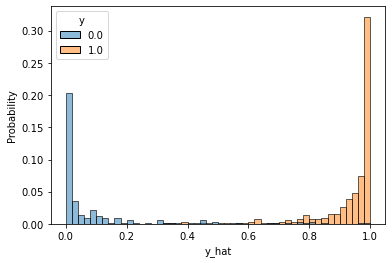

In [19]:
df = pd.DataFrame(torch.cat([y,y_hat],dim=1).detach().numpy(),
                    columns=['y', 'y_hat'])

sns.histplot(df, x='y_hat', hue='y', bins=50, stat='probability')
plt.show()
# 양극단으로 완벽하게 치우쳐져 있다면 모델이 매우 예측을 잘하고 있다고 판단할 수 있다.